# <u> **Customer Segmentation on Marketing Analytics using RFM Analysis.** <u> 

*This is a marketing data set which contains data of the customers belonging ABC company. This data set has 2240 rows and 28 columns.Since this is a marketing data set, we can categorize the variables in terms of the 4 P's of marketing: products, people (customers), places (channels), and promotions (discounts & campaigns).
The variables are as follows:*

### *People:*
- *ID: Customer's unique identifier*
- *Year_Birth: Customer's birth year*
- *Education: Customer's education level*
- *Marital_Status: Customer's marital status*
- *Income: Customer's yearly household income*
- *Kidhome: Number of children in customer's household*
- *Teenhome: Number of teenagers in customer's household*
- *Dt_Customer: Date of customer's enrollment with the company*
- *Recency: Number of days since customer's last purchase*
- *Complain: 1 if customer complained in the last 2 years, 0 otherwise*
- *Country: Customer's location*

### *Products:*
- *MntWines: Amount spent on wine in the last 2 years*
- *MntFruits: Amount spent on fruits in the last 2 years*
- *MntMeatProducts: Amount spent on meat in the last 2 years*
- *MntFishProducts: Amount spent on fish in the last 2 years*
- *MntSweetProducts: Amount spent on sweets in the last 2 years*
- *MntGoldProds: Amount spent on gold in the last 2 years*

### *Promotions:*
- *NumDealsPurchases: Number of purchases made with a discount*
- *AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise*
- *AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise*
- *AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise*
- *AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise*
- *AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise*
- *Response: 1 if customer accepted the offer in the last campaign, 0 otherwise*

### *Places:*
- *NumWebPurchases: Number of purchases made through the company's web site*
- *NumCatalogPurchases: Number of purchases made using a catalogue*
- *NumStorePurchases: Number of purchases made directly in stores*
- *NumWebVisitsMonth: Number of visits to company's web site in the last month*

### <u> <font color = black> *Steps Involved In The Process.* <u> </font>
- ***Determining the Problem Statement***
- ***Big Picture on the Dataset***
- ***Data Cleaning and Analysis***
- ***Model Building*** 
- ***Interpretation and Conclusion***

## <font color = black>1). <u>Problem Statement Under Consideration:<u></font>
    
### *Targeting High Value Customers to the company based on the Customer attributes in order to have effective implementation of marketing strategies and also for optimal resource allocation.*

## <font color = black>2).<u>Big Picture on the Dataset.<u></font>

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import datetime as dt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from scipy.stats import probplot
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
%matplotlib inline

In [2]:
path = r"C:\Users\User\Downloads\marketing_data_new.csv"
data = pd.read_csv(path)

In [1]:
#data.head()

###  -> Determining the Shape and Structure on the dataset:

In [6]:
data.shape

(2240, 28)

*This dataset contains 2240 rows and 28 columns.*

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

*Here The income Variable is of the datatype string , which has to be converted into Integer.*

In [4]:
data.rename(columns = {' Income ':'Income','Response':'AcceptedCmp6'}, inplace = True)

### -> Determining the Missing values:

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp6            0
Complain                0
Country                 0
dtype: int64

### -> Determining the 5 - Number Summary :

In [10]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*The above table provides us a understanding on the structure of the data set. This enables us in simplifying the data and also helps in understanding the insights of the data by providing the frequently repeated numbers, the middle of all the numbers , variations among the variables etc. This helps in knowing whether the data is consistent or inconsistent for the further analysis.*

## <font color = black>3).<u>Data Cleaning and Analysis.<u></font>

## -> Data Cleaning :

### i). Conversion of the datatype of Income variable:

In [11]:
data['Income'].head()

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object

*Here, the variable 'INCOME' is of the string datatype and it also has a '$' symbol,  which has to be removed.* 

In [5]:
warnings.filterwarnings("ignore")

data['Income'] = data['Income'].str.replace("$","").str.replace(",","")
data['Income'] = data['Income'].astype(float)

###  ii)  Merging rows of two variables:

In [13]:
# Merging the rows of Marital Status
data['Marital_Status'] = data['Marital_Status'].replace(["Alone","YOLO","Absurd"],"Single")
print(data['Marital_Status'].unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow']


In [14]:
# Merging the rows of education variable:
data['Education'] = data['Education'].replace(["2n Cycle","Master"],"Masters")
print(data['Education'].unique())

['Graduation' 'PhD' 'Masters' 'Basic']


### iii) Conversion of the datetime format:

In [15]:
data['Dt_Customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object

In [16]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%m/%d/%y')
data['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

### iv). Addition of New Variables:

In [17]:
data['Expenditure'] = data['MntWines'] + data['MntSweetProducts'] + data['MntMeatProducts']+ data['MntGoldProds'] + data['MntFruits'] + data['MntFishProducts'] 

In [18]:
data['Age'] = 2021 - data['Year_Birth']

In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country', 'Expenditure',
       'Age'],
      dtype='object')

## -> Data Analysis :

In [20]:
cat_count = 0
num_count = 0
for i in data.dtypes:
    if i == 'object':
        cat_count = cat_count + 1
    else:
        num_count = num_count + 1

print("The Number of Numerical variables :",num_count)
print("The Number of qualitative variables:",cat_count)

The Number of Numerical variables : 27
The Number of qualitative variables: 3


###  i). Imputation of Missing values:

In [21]:
data_group = data.groupby(['Marital_Status','Education']).aggregate({'Income':'median'})
data_group

Income
Marital_Status Education          
Divorced       Basic        9548.0
               Graduation  55635.0
               Masters     49297.0
               PhD         50613.5
Married        Basic       22352.0
               Graduation  50737.0
               Masters     50017.0
               PhD         57081.5
Single         Basic       16383.0
               Graduation  49973.5
               Masters     49514.0
               PhD         48918.0
Together       Basic       23179.0
               Graduation  53977.0
               Masters     47586.5
               PhD         56756.0
Widow          Basic       22123.0
               Graduation  58275.0
               Masters     51459.5
               PhD         57032.0

In [22]:
df = data

df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Divorced'), 9548.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Divorced'),55635.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Divorced'), 49297.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Divorced'), 50613.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Married'), 22352.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Married'), 50737.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Married'), 50017.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Married'), 57081.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Single'), 16383.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Single'), 49973.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Single'), 49514.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Single'), 48918.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Together'), 23179.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Together'), 53977.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Together'), 47586.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Together'), 56756.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Widow'), 22123.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Widow'), 58275.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Widow'), 51459.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Widow'), 57032.0, df['Income'])

data = df

In [23]:
data['Income'].isnull().sum()

0

### ii). Determining the distributions of Continous variables:

In [24]:
data_continous = data[['Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age', 'Expenditure']]
data_continous.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expenditure
0,84835.0,189,104,379,111,189,218,51,1190
1,57091.0,464,5,64,7,0,37,60,577
2,67267.0,134,11,59,15,2,30,63,251
3,32474.0,10,0,1,0,0,0,54,11
4,21474.0,6,16,24,11,0,34,32,91


<Figure size 720x360 with 0 Axes>

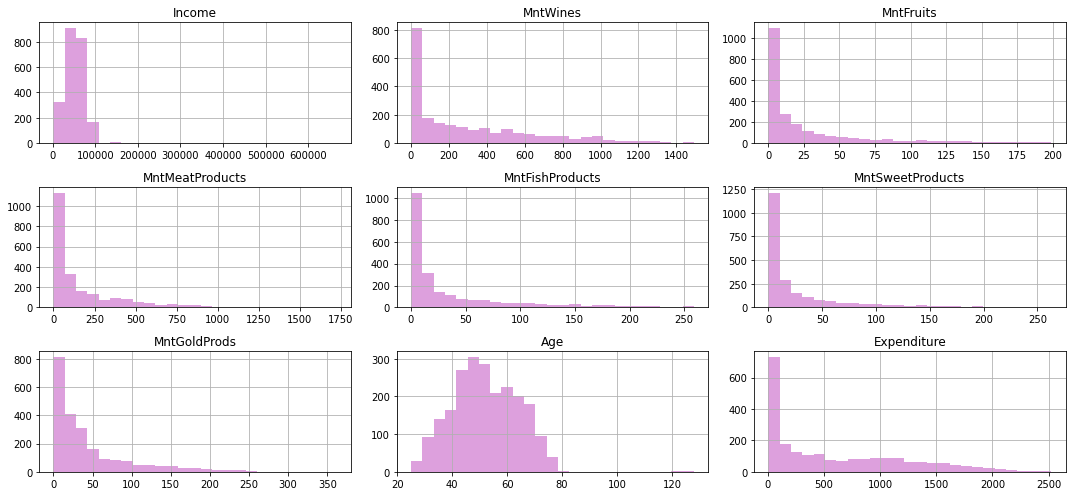

In [25]:
plt.figure(figsize = (10,5))
data_continous.hist(figsize = (15,7), color = "plum", bins = 25)
plt.tight_layout()

### iii). Detecting the Outliers in Continous Variables:

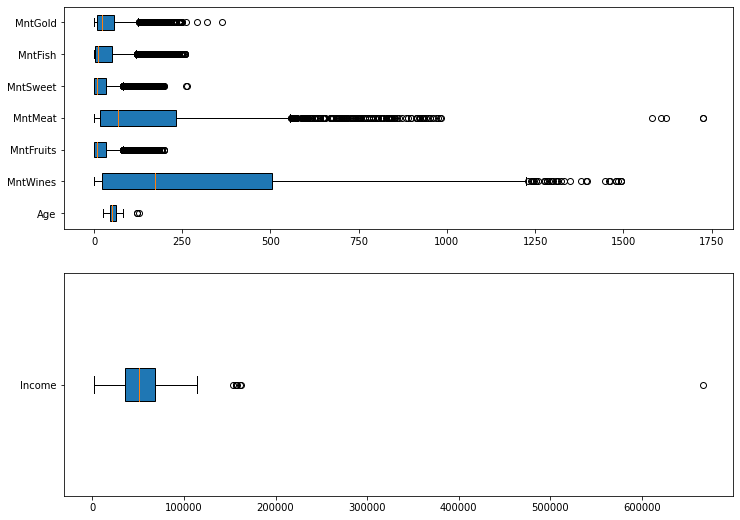

In [26]:
df1 = df[["Age","MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntFishProducts","MntGoldProds"]]
df2 = df["Income"]
df3 = df["Expenditure"]
fig = plt.figure(figsize =(12, 9))
ax = fig.add_subplot(211)

#creating boxplot
bp = ax.boxplot(df1, patch_artist = True, vert = 0)

# setting axis names
ax.set_yticklabels(["Age",'MntWines','MntFruits','MntMeat',
                     'MntSweet','MntFish','MntGold'])
ax = fig.add_subplot(212)

#creating boxplot
bp = ax.boxplot(df2, patch_artist = True, vert = 0)

# setting axis names
ax.set_yticklabels(["Income"])

plt.show()

## <font color = black>4). <u>Model Building Based on RFM Analysis: <u></font>

*RFM analysis is a customer behavior segmentation technique. Based on customers’ historical transactions, RFM analysis focuses on 3 main aspects of customers’ transactions:*
- *Recency(R)  : How recently customers have made their purchases.*
- *Frequency(F): How often customers have made their purchases.*
- *Monetary(M) : How much money customers have paid for their purchases.*

### -> Determining the RFM Score:

Here, we have variables such as 'Recency', 'NumWebVisitsMonth' and 'Expenditure' which determines the RFM for our dataset.

In [27]:
# Calculating Frequency:
data['Frequency'] = data['NumStorePurchases'] + data['NumCatalogPurchases'] + data['NumWebPurchases']

# Renaming the variables of recency ,Expenditure to Monetory , Recent_purchase.
data.rename(columns = {'Expenditure':'Monetory','Recency':'Recent_Purchase'}, inplace = True)

In [28]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recent_Purchase', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country', 'Monetory',
       'Age', 'Frequency'],
      dtype='object')

### -> Choosing the Right Country for the Analysis:

***After setting the RFM, we will now look at the number of the customers in each of the seven countries given in our datatset.
We will then select the country with the highest customers for our analysis as the maximum revenue for the company is determined by that country.***

In [29]:
data['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

### -> Creating a dataframe of Spain:

In [30]:
df_spain = data[(data['Country'] == 'SP')].reset_index(drop = True)
df_spain = pd.DataFrame(df_spain[['ID','Recent_Purchase','Frequency','Monetory']])
df_spain.head()

,ID,Recent_Purchase,Frequency,Monetory
0,1826,0,14,1190
1,5371,0,6,91
2,7348,0,16,1192
3,1991,0,6,96
4,5642,0,10,222


In [31]:
df_spain.describe()

,ID,Recent_Purchase,Frequency,Monetory
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,5558.421005,49.707763,12.404566,604.767123
std,3260.098770,29.103712,7.238164,613.021937
min,17.000000,0.000000,0.000000,6.000000
25%,2802.000000,24.500000,6.000000,67.500000
50%,5371.000000,51.000000,12.000000,367.000000
75%,8423.500000,74.000000,19.000000,1045.000000
max,11191.000000,99.000000,32.000000,2525.000000


The above table gives the 5 -table summary of the all the columns of the newly selected dataframe of Spain.

####  *Depending on the granularity requirement of the company , each customer is scored on the RFM attributes on a scale of 1–3, 3 being the highest.* 

In [32]:
quantiles_recency = df_spain.quantile(q = [0.25,0.50,0.75])
quantiles_recency

,ID,Recent_Purchase,Frequency,Monetory
0.25,2802.0,24.5,6.0,67.5
0.50,5371.0,51.0,12.0,367.0
0.75,8423.5,74.0,19.0,1045.0


In [33]:
quantiles_recency = df_spain.quantile(q = [0.25,0.50,0.75])


# Creating functions to determine the RFM score:
def R_score(data):
    if data < quantiles_recency['Recent_Purchase'][0.25]:
        return 3
    elif data < quantiles_recency['Recent_Purchase'][0.75]:
        return 2
    else:
        return 1
    
def F_score(data):
    if data < quantiles_recency['Frequency'][0.25]:
        return 3
    elif data < quantiles_recency['Frequency'][0.75]:
        return 2
    else:
        return 1    
    
    
def M_score(data):
    if data < quantiles_recency['Monetory'][0.25]:
        return 3
    elif data < quantiles_recency['Monetory'][0.75]:
        return 2
    else:
        return 1     

In [34]:
df_spain['R_score'] = df_spain.Recent_Purchase.apply(lambda x : R_score(x))
df_spain['F_score'] = df_spain.Frequency.apply(lambda x : F_score(x))
df_spain['M_score'] = df_spain.Monetory.apply(lambda x : M_score(x))
df_spain['rfm_score'] = df_spain['R_score'].map(str) + df_spain['F_score'].map(str) + df_spain['M_score'].map(str) 

In [35]:
df_spain.head()

,ID,Recent_Purchase,Frequency,Monetory,R_score,F_score,M_score,rfm_score
0,1826,0,14,1190,3,2,1,321
1,5371,0,6,91,3,2,2,322
2,7348,0,16,1192,3,2,1,321
3,1991,0,6,96,3,2,2,322
4,5642,0,10,222,3,2,2,322


### -> Determining the distributions of Variables:

<AxesSubplot:ylabel='Density'>

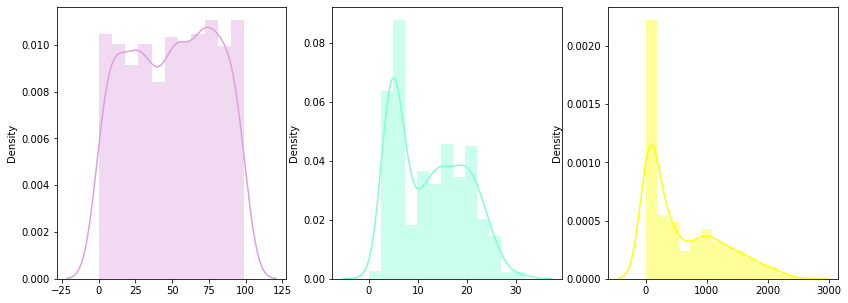

In [36]:
plt.figure(figsize = (14,5))

plt.subplot(1,3, 1)
sns.distplot(x = df_spain['Recent_Purchase'], kde = True, color = 'plum')

plt.subplot(1,3,2)
sns.distplot(x = df_spain['Frequency'], kde = True, color = 'aquamarine')

plt.subplot(1,3,3)
sns.distplot(x = df_spain['Monetory'], kde = True, color = 'yellow')

In [37]:
df_spain.skew()

ID                 0.049511
Recent_Purchase   -0.049497
Frequency          0.333681
Monetory           0.887689
R_score            0.016029
F_score            0.010360
M_score            0.000000
rfm_score          0.014853
dtype: float64

Clearly, the variables 'Recent_Purchase' and 'Frequency' are lying between [-0.5, 0.5] indicating that they are symmetric(Normally Distributed). On the other hand, the skewness of the variable 'Monetory' is 0.88 indicating the data is highly skewed.

In [38]:
df_log = df_spain.copy()
df_log['Monetory'] = np.log1p(df_log['Monetory'])

In [39]:
df_log.head()

,ID,Recent_Purchase,Frequency,Monetory,R_score,F_score,M_score,rfm_score
0,1826,0,14,7.082549,3,2,1,321
1,5371,0,6,4.521789,3,2,2,322
2,7348,0,16,7.084226,3,2,1,321
3,1991,0,6,4.574711,3,2,2,322
4,5642,0,10,5.407172,3,2,2,322


Text(0.5, 1.0, 'After Transformation QQ-Plot')

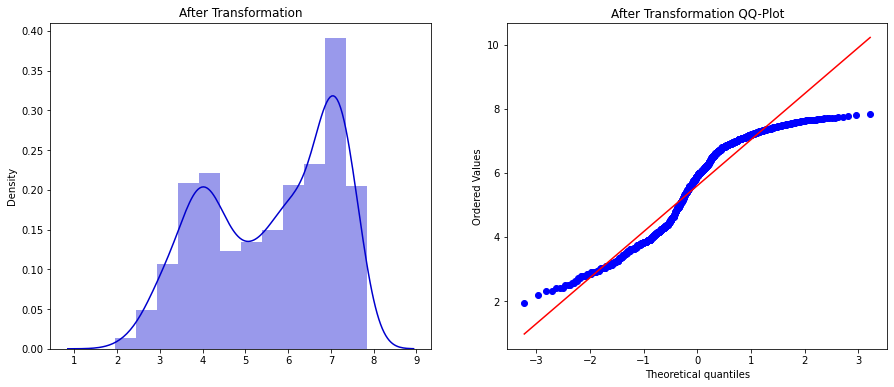

In [40]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(x = df_log['Monetory'], kde = True, color = "mediumblue")
plt.title('After Transformation')

plt.subplot(1,2,2)
probplot(df_log['Monetory'], dist = 'norm', plot=plt)
plt.title("After Transformation QQ-Plot")

### -> Scaling the Features in the Dataset:

In [41]:
# Normalizing the data :
scaler = preprocessing.MinMaxScaler()
df_spain_norm = pd.DataFrame(scaler.fit_transform(df_log[['Recent_Purchase','Frequency','Monetory']]))
df_spain_norm.columns = ['Recent_Purchase','Frequency','Monetory']

df_spain_norm.head()

,Recent_Purchase,Frequency,Monetory
0,0.0,0.4375,0.872320
1,0.0,0.1875,0.437444
2,0.0,0.5000,0.872605
3,0.0,0.1875,0.446431
4,0.0,0.3125,0.587802


In [42]:
df_spain_norm.describe()

,Recent_Purchase,Frequency,Monetory
count,1095.000000,1095.000000,1095.000000
mean,0.502099,0.387643,0.620098
std,0.293977,0.226193,0.252187
min,0.000000,0.000000,0.000000
25%,0.247475,0.187500,0.387349
50%,0.515152,0.375000,0.672868
75%,0.747475,0.593750,0.850272
max,1.000000,1.000000,1.000000


## 4).<u>  Model Building : <u>

## <font color = black> -> <u>*Various clustering Algorithms Under Consideration:* <u></font>

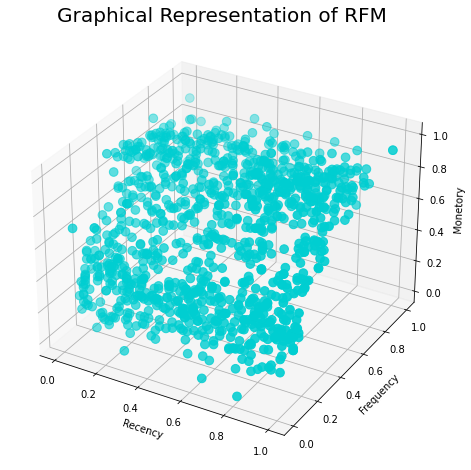

In [43]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection='3d')

im = ax.scatter(df_spain_norm["Recent_Purchase"],df_spain_norm["Frequency"],df_spain_norm["Monetory"],
               color = 'darkturquoise',s = 75)       
plt.title('Graphical Representation of RFM ',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

***Here, we can observe that the datapoints do not follow any pattern rather have been clustered over a certain area clearly depicting it is a convex cluster.***

## 1). K - Means Clustering Algorithm :

***The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.***

*The K-Means Clustering Algorithm works well when the data is not skewed. Moreover, it uses distance based measurements because of which it becomes extermely important to scale the data and also treat outliers as it is not robust.*

In [44]:
#Define Kmeans Algorithm and returning the centroids, clusters, interia :
def Kmeans_algo(data,n):
    """ Function for Kmeans Clustering."""
    
    kmeans_model = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300,
                         random_state = 42, algorithm = 'elkan')
    kmeans_model.fit(data)
    
    #creating centroids:
    centroids = kmeans_model.cluster_centers_
    
    #creating labels:
    labels = kmeans_model.labels_
    df_spain_norm['label'] = labels
    
    #evaluation metrics:
    interia = kmeans_model.inertia_
    sil_score = metrics.silhouette_score(data, labels)
    
    return interia, labels, centroids, sil_score

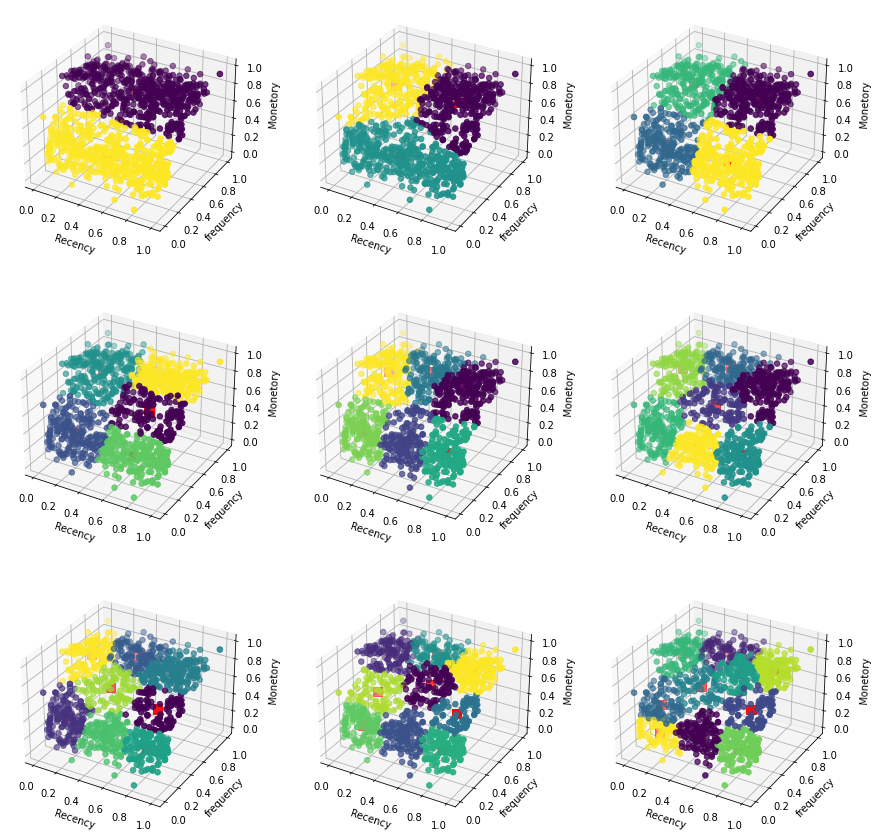

In [45]:
# creating a dataframe :
x3 = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]

x3_interia_score = []
x3_s_score = []

fig = plt.figure(figsize = (15,15))

#call the function :
for i in range(2,11):
    x3_interia, x3_lables, x3_centroids, x3_sil_score = Kmeans_algo(x3, i)
    x3_interia_score.append(x3_interia)
    x3_s_score.append(x3_sil_score)
    centroids_df = pd.DataFrame(x3_centroids, columns = ['Recent_Purchase','Frequency','Monetory'])
    
    ax = fig.add_subplot(330 + i - 1, projection='3d')
    
    #scatter plot:
    ax.scatter(df_spain_norm['Recent_Purchase'],df_spain_norm['Frequency'],df_spain_norm['Monetory'],
                s = 30, c = df_spain_norm["label"], cmap = "viridis")
    ax.scatter(centroids_df['Recent_Purchase'], centroids_df['Frequency'], centroids_df['Monetory'], 
               s = 90, marker= ",", color = "r")
    ax.set_xlabel('Recency')
    ax.set_ylabel('frequency')
    ax.set_zlabel('Monetory')

### -> HyperParameter Tuning For K-Means:

***The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters.***

Text(0, 0.5, 'Inertia Values')

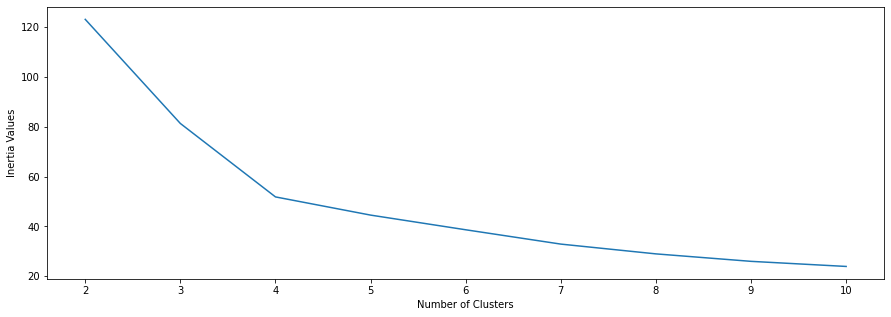

In [46]:
#elbow method:
plt.figure(11, figsize = (15,5))
plt.plot(np.arange(2,11), x3_interia_score, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")    

*As Plotted, the plot looks like an arm with a clear elbow at k = 4.*

#### -> Validation on the Number of Clusters Chose by Silhouette Method:

Text(0, 0.5, 'Silhouette Score')

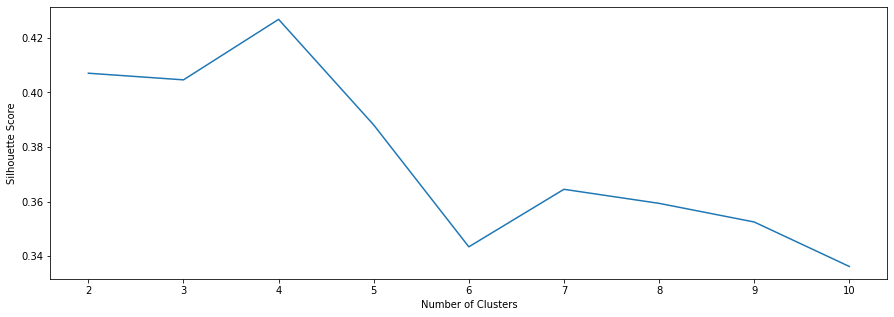

In [47]:
# plot inertia values against number of clusters
plt.figure(11, figsize=(15,5))
plt.plot(np.arange(2,11) , x3_s_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

*From the above graph, there is a clear peak at k = 4.  Hence it is optimal.*

### -> Applying the Updated Algorithm :

In [48]:
d1 = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]
model1 = KMeans(n_clusters = 4, max_iter = 400, random_state = 42)
model1.fit(d1)
d1['labels'] = model1.labels_

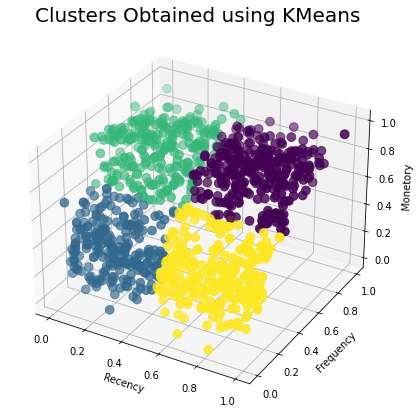

In [49]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(d1["Recent_Purchase"], d1["Frequency"], d1["Monetory"],
               c = model1.labels_ , cmap = "viridis" ,s = 75)       
plt.title('Clusters Obtained using KMeans',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [51]:
score1 = metrics.silhouette_score(d1[['Recent_Purchase','Frequency','Monetory']], model1.labels_, metric='euclidean')
c1 = metrics.calinski_harabasz_score(d1[['Recent_Purchase','Frequency','Monetory']], model1.labels_)

## 2). DBSCAN Algorithm:

#### *DBSCAN is clustering algorithm which is ruboust to outliers or noise. Before the implementation of this algoritjm its very important we find the optimal value for two important parameters EPSILON and MNT POINTS.*
- ***Epsilon :  We will using the KNearestNeighbours to compute the average distance for each data point. Therefore we need to first find the optimal value for the nearest neighbours to be considered.***
- ***Minimum Points :  Number of Dimensions *2***

In [52]:
df_spain_dbscan = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]
df_spain_dbscan.head()

,Recent_Purchase,Frequency,Monetory
0,0.0,0.4375,0.872320
1,0.0,0.1875,0.437444
2,0.0,0.5000,0.872605
3,0.0,0.1875,0.446431
4,0.0,0.3125,0.587802


### ->Hyper Parameter Tuning:
### i)Determining the optimal Number of Minimum Points:

In [53]:
Mnt_pnts = len(df_spain_dbscan.columns)*2
print('The Minimum Points under Consideration is :', Mnt_pnts)

The Minimum Points under Consideration is : 6


### ii). Determining the optimal value for Epsilon:

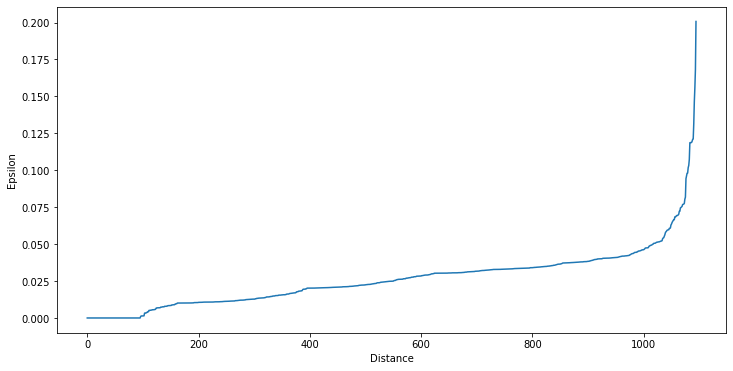

In [54]:
# Firstly, finding average distance using KNN:
neighbours = NearestNeighbors(n_neighbors = Mnt_pnts)
knn_data = neighbours.fit(df_spain_dbscan)

#Obtaining indices and distances :
distances, indices = knn_data.kneighbors(df_spain_dbscan)

#Sorting the distance:
sorting_distance = np.sort(distances, axis = 0)

#sorted distance
sorted_distance = sorting_distance[:,1]

#plotting between epsilon and distance
plt.figure(figsize = (12,6))
plt.plot(sorted_distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

*Here, the ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. Zooming in on the k-distance plot, it looks like the optimal value for ε is around 0.100 to 0.120. We ended up looping through combinations of MinPts and ε values slightly above and below the values estimated here to find the model of best fit.*
- ***The ideal value chose for Epsilon will be 0.120***

### -> Applying the  Updated Algorithm:

In [55]:
# Creating a dataframe and using DBSCAN algorithm:
x1 = df_spain_dbscan[['Recent_Purchase','Frequency','Monetory']]
dbscan_model = DBSCAN(eps = 0.120, min_samples = Mnt_pnts).fit(df_spain_dbscan)
df_spain_dbscan['labels'] = dbscan_model.labels_
print('The Number of Clusters Obtained will be :')
print(df_spain_dbscan['labels'].value_counts())

#calculating Silhoutte Score:
print("")
score = metrics.silhouette_score(x1, dbscan_model.labels_)
print("The Silhoutte Score is:", score)

The Number of Clusters Obtained will be :
 0    1084
-1      11
Name: labels, dtype: int64

The Silhoutte Score is: 0.23236031425210382


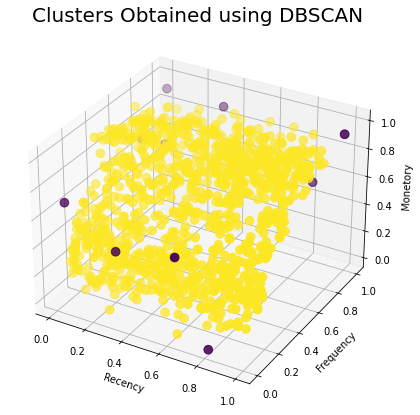

In [56]:
#plotting :
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_spain_dbscan["Recent_Purchase"],df_spain_dbscan["Frequency"],df_spain_dbscan["Monetory"],
               c = df_spain_dbscan["labels"] , cmap ="viridis",s = 75)       
plt.title('Clusters Obtained using DBSCAN',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [58]:
d2 = df_spain_dbscan[['Recent_Purchase','Frequency','Monetory']]
model2 = DBSCAN(eps = 0.120, min_samples = Mnt_pnts)
model2.fit(d2)

DBSCAN(eps=0.12, min_samples=6)

In [68]:
score2 = metrics.silhouette_score(d2, model2.labels_, metric='euclidean')
c2 = metrics.calinski_harabasz_score(d2, model2.labels_)

## 3). Agglomerative Hierarchical clustering:

***It is a type of Clustering algorithm where clusters are successively merged based on the similarity measure until all clusters have been merged into one big cluster containing all objects.***

In [60]:
df_spain_agglo = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]
df_spain_agglo.head()

,Recent_Purchase,Frequency,Monetory
0,0.0,0.4375,0.872320
1,0.0,0.1875,0.437444
2,0.0,0.5000,0.872605
3,0.0,0.1875,0.446431
4,0.0,0.3125,0.587802


### i). Determining the Number of Clusters:

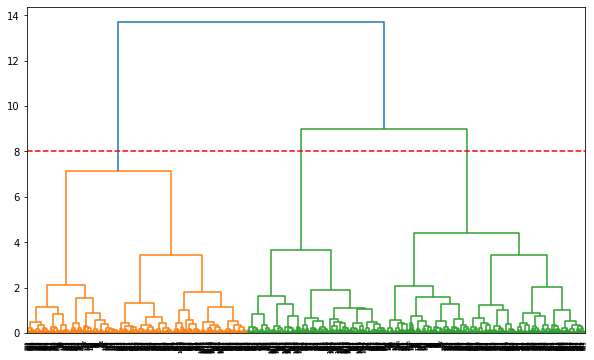

In [61]:
plt.figure(figsize = (10,6))
shc.dendrogram(shc.linkage(df_spain_agglo, method='ward'))
plt.axhline(y = 8, color='r', linestyle='--')
plt.show()

#### -> Validation on the Number of Clusters Chose by Silhouette Method:

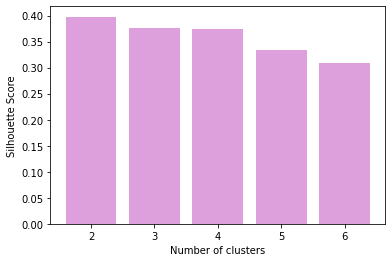

In [62]:
#validation
agglo_s_score = []
x1 = df_spain_agglo[['Recent_Purchase','Frequency','Monetory']]

for n_cluster in range(2,7):
    agglo_s_score.append(metrics.silhouette_score(x1, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x1))) 
    
    
k = [2, 3, 4, 5, 6] 
plt.bar(k,agglo_s_score, color = 'plum' ) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

*Clearly, the number of Clusters to be Chosen is 3.*

### -> Applying the Updated Algorithm :

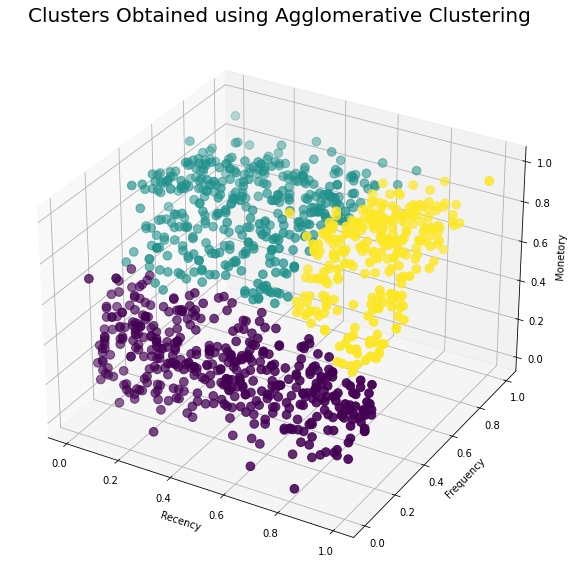

In [63]:
x1 = df_spain_agglo[['Recent_Purchase','Frequency','Monetory']]


agglo_hier_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 
agglo_hier_model.fit(df_spain_agglo)
df_spain_agglo['labels'] = agglo_hier_model.labels_

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_spain_agglo["Recent_Purchase"],df_spain_agglo["Frequency"],df_spain_agglo["Monetory"],
               c = df_spain_agglo['labels'], cmap ="viridis",s = 75) 

plt.title('Clusters Obtained using Agglomerative Clustering',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [64]:
d3 = df_spain_agglo[['Recent_Purchase','Frequency','Monetory']]
model3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward') 
model3.fit(d3)

AgglomerativeClustering(n_clusters=3)

In [66]:
score3 = metrics.silhouette_score(d3, model3.labels_, metric='euclidean')
c3 = metrics.calinski_harabasz_score(d3, model3.labels_)

## -> <u> Validation of the Clustering algorithms:<u>

In [69]:
#dataframe of Silhoutte Score:
validation_df = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Silhouette Score": [score1, score2, score3]})

# dataframe of calinski:
validation_df_cal = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Calinski Score": [c1,c2,c3]})

<AxesSubplot:xlabel='Algorithms', ylabel='Calinski Score'>

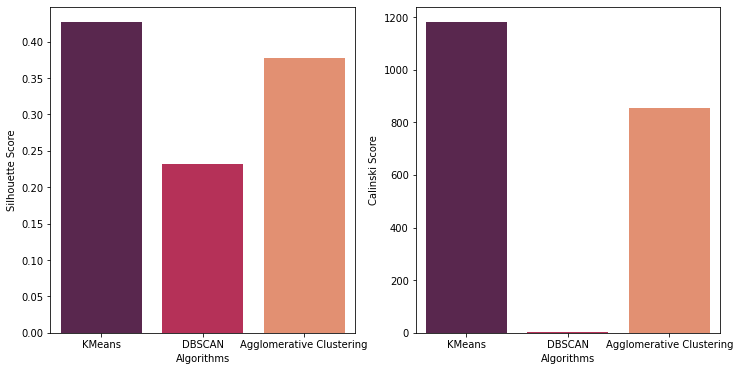

In [70]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.barplot(x = validation_df['Algorithms'], y = validation_df['Silhouette Score'], 
              palette = 'rocket')

plt.subplot(1,2,2)
sns.barplot(x = validation_df_cal['Algorithms'], y = validation_df_cal['Calinski Score'], 
              palette = 'rocket')

***Clearly, considering the above two scores we can conclude that KMeans is better fit model to our dataset.***

## 5). <u> Interpretation and Conclusion:<u>

***Here, we choose KMeans Algorithm because of which we have 4 different clusters formed. It is now important we identify the clusters and group the cistomers accordingly.***

In [71]:
df1 = pd.DataFrame(df_spain[['ID','Recent_Purchase','Frequency','Monetory']])
df2 = pd.DataFrame(d1['labels'])

final_df = pd.concat([df1,df2], axis = 1)
final_df.head()

,ID,Recent_Purchase,Frequency,Monetory,labels
0,1826,0,14,1190,2
1,5371,0,6,91,1
2,7348,0,16,1192,2
3,1991,0,6,96,1
4,5642,0,10,222,1


### -> Grouping into Clusters:

In [72]:
final_df_cluster0 = final_df[(final_df['labels'] == 0)].reset_index()   # Loyal 
final_df_cluster0.describe() 

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.0
mean,806.819620,5301.933544,73.683544,18.427215,1070.784810,0.0
std,161.404242,3394.151189,14.136562,4.425513,494.014489,0.0
min,512.000000,17.000000,48.000000,10.000000,304.000000,0.0
25%,671.500000,2387.500000,62.000000,15.000000,684.250000,0.0
50%,800.500000,5119.000000,73.000000,18.500000,1004.500000,0.0
75%,945.500000,8462.750000,86.000000,22.000000,1406.750000,0.0
max,1094.000000,11166.000000,99.000000,32.000000,2440.000000,0.0


In [73]:
final_df_cluster1 = final_df[(final_df['labels'] == 1)].reset_index()   
final_df_cluster1.describe()

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,249.911392,5779.405063,22.236287,5.426160,82.185654,1.0
std,144.480031,3257.692971,13.673674,1.967918,67.019407,0.0
min,1.000000,35.000000,0.000000,0.000000,9.000000,1.0
25%,127.000000,3050.000000,11.000000,4.000000,37.000000,1.0
50%,246.000000,5835.000000,22.000000,5.000000,62.000000,1.0
75%,370.000000,8594.000000,33.000000,7.000000,103.000000,1.0
max,505.000000,11191.000000,48.000000,11.000000,373.000000,1.0


In [239]:
final_df_cluster2 = final_df[(final_df['labels'] == 2)].reset_index()   #potential
final_df_cluster2.describe()

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.0
mean,256.719557,5694.678967,22.819188,18.029520,1027.453875,2.0
std,149.117015,3211.151421,14.147391,4.530458,542.629343,0.0
min,0.000000,158.000000,0.000000,9.000000,266.000000,2.0
25%,127.000000,2906.000000,11.000000,14.500000,506.000000,2.0
50%,260.000000,5512.000000,23.000000,18.000000,999.000000,2.0
75%,387.500000,8489.000000,35.000000,21.000000,1400.500000,2.0
max,515.000000,11112.000000,48.000000,32.000000,2525.000000,2.0


In [74]:
final_df_cluster3 = final_df[(final_df['labels'] == 3)].reset_index()
final_df_cluster3.describe()

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.0
mean,794.132841,5527.981550,72.664207,5.859779,95.697417,3.0
std,178.867810,3145.898903,15.667192,2.360690,79.043898,0.0
min,504.000000,48.000000,48.000000,0.000000,6.000000,3.0
25%,632.500000,2995.000000,58.000000,4.000000,37.500000,3.0
50%,802.000000,5253.000000,73.000000,5.000000,64.000000,3.0
75%,948.500000,8152.500000,86.000000,7.000000,137.500000,3.0
max,1093.000000,11188.000000,99.000000,11.000000,311.000000,3.0


### -> Conclusion based on the Clusters Formed:

- ***CLUSTER 2: Loyal Customers, who are the champions of all the customers with highest score of RFM.***
- ***CLUSTER 0: Customers who have the most potential to become the Champions. They recently buy the products and they make their purchases quite frequently. Moreover, the amount they spent is quite great.***
- ***CLUSTER 1: Customers who usually purchase products during some offer/discounts.Their RFM score is quite low due to which they are more likely to be churned out.***
- ***CLUSTER 3: Customers who churn***

***Based on Customer Segmentation that has been done in SPAIN, high-value Customers are those who either belong to CLUSTER 2 or 0. Moreover, the company can also try implementing some effective Marketing Strategies to retain the customers who are more likely to be churned out.***